Projekt
=======


Wprowadzenie
------------

Zbiór danych dotyczący ćwiczeń członków siłowni, który został utworzony na podstawie 973 próbek zebranych podczas sesji treningowych. Dane zawierają informacje demograficzne, fizjologiczne oraz szczegóły dotyczące rutyny treningowej użytkowników siłowni. Zbiór został najprawdopodobniej utworzony na siłowni lub centrum fitness poprzez ankietowanie, monitorowanie i rejestrowanie aktywności oraz parametrów zdrowotnych uczestników. Pytania badawcze będą dotyczyć m.in. zależności między poziomem doświadczenia a wynikami treningowymi, wpływu cech fizycznych na intensywność ćwiczeń, oraz analizy wzorców postępów i zdrowia użytkowników.

Czyszczenie i porządkowanie danych
----------------------------------


Importowanie wykorzystywanych bibliotek

In [433]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

Przypisanie obiektu DataFrame utworzonego ze wczytanego pliku .csv  do zmiennej df

In [434]:
df = pd.read_csv('data/silownia_new.csv')

Podglądnięcie fragmentu obiektu DataFrame

In [435]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,NaN,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,NaN
1,46.0,Female,74.9,1.53,179,151,66,1.30,883,NaN,33.9,2.1,4,2,32.00
2,32.0,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,NaN
3,25.0,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38.0,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39


Sprawdzenie rozkładu wartości numerycznych w zbiorze danych

In [436]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,873.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,823.000000
mean,38.626575,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.816549
std,12.273464,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.600485
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.105000
50%,39.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,23.940000
75%,50.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.450000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,47.720000


Dodatkowe informacje dotyczące zbioru danych

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            873 non-null    float64
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    int64  
 9   Workout_Type                   823 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

Sprawdzenie czy w poszczególnych kolumnach są brakujące wartości

In [438]:
df.isna().sum()

Age                              100
Gender                             0
Weight (kg)                        0
Height (m)                         0
Max_BPM                            0
Avg_BPM                            0
Resting_BPM                        0
Session_Duration (hours)           0
Calories_Burned                    0
Workout_Type                     150
Fat_Percentage                     0
Water_Intake (liters)              0
Workout_Frequency (days/week)      0
Experience_Level                   0
BMI                              150
dtype: int64

W zbiorze danych brakuje wartości w kolumnach dotyczących wieku, typu treningu oraz BMI. Rozpatrzymy każdą z kolumn i dobierzemy odpowiednie działanie.

Zbiór danych jest wybrakowany w ilości 150 rekordów wartości BMI. Jednocześnie dostępne mamy dla wszystkich obserwacji wartości składające się na wzór BMI tj. waga i wzrost użytkownika. Dzięki temu możemy w prosty sposób dokonać imptutacji deterministycznej uzywając wzoru:
$$
BMI = \frac{\text{waga w kg}}{\text{wzrost do kwadratu}}
$$


In [439]:
mask_missing_bmi = df["BMI"].isna()
df.loc[mask_missing_bmi, 'BMI'] = round((
    df.loc[mask_missing_bmi, 'Weight (kg)'] /
    (df.loc[mask_missing_bmi, 'Height (m)'] ** 2)
), 2)

Wizualizacja brakujących wartości w kolumnach

<Axes: >

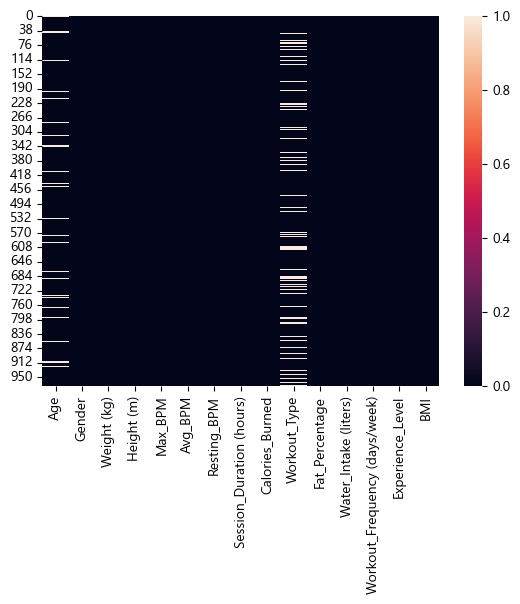

In [440]:
sns.heatmap(df.isna())

Sprawdzamy korelację między brakującymi wartościami różnych cech.

<Axes: >

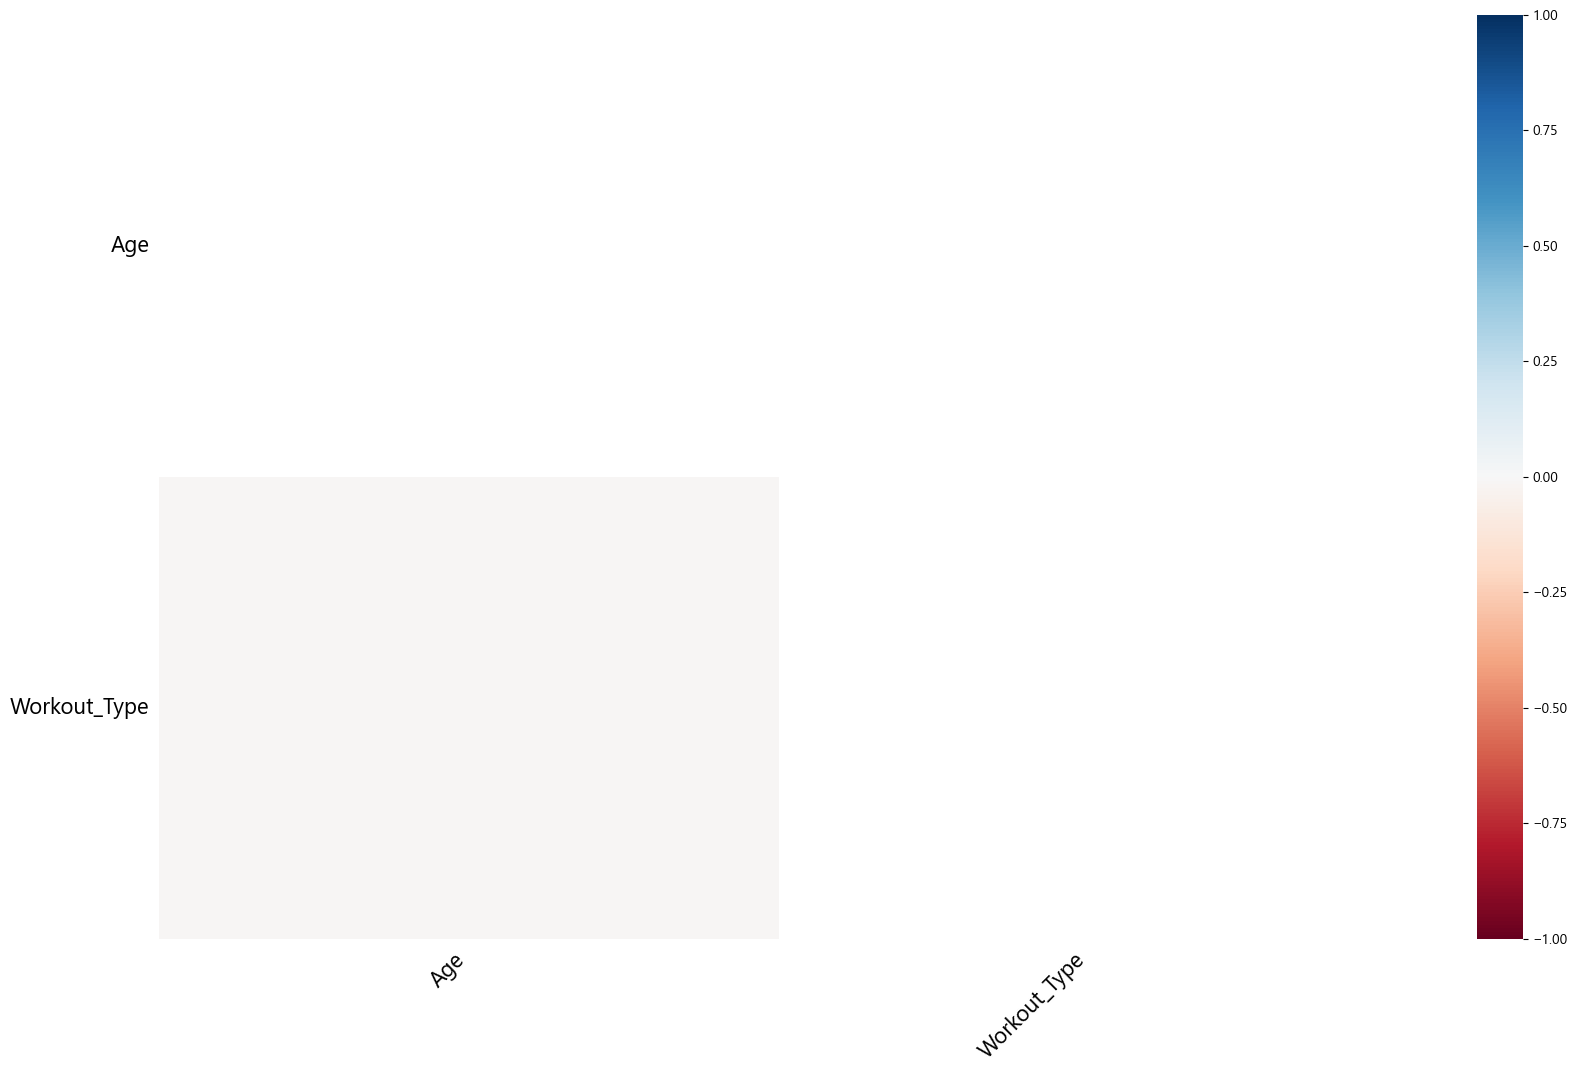

In [441]:
msno.heatmap(df)

Heatmapa wskazuje na niskie korelacje między zmiennymi. Dodatkowo tworzymy dendrogram.

<Axes: >

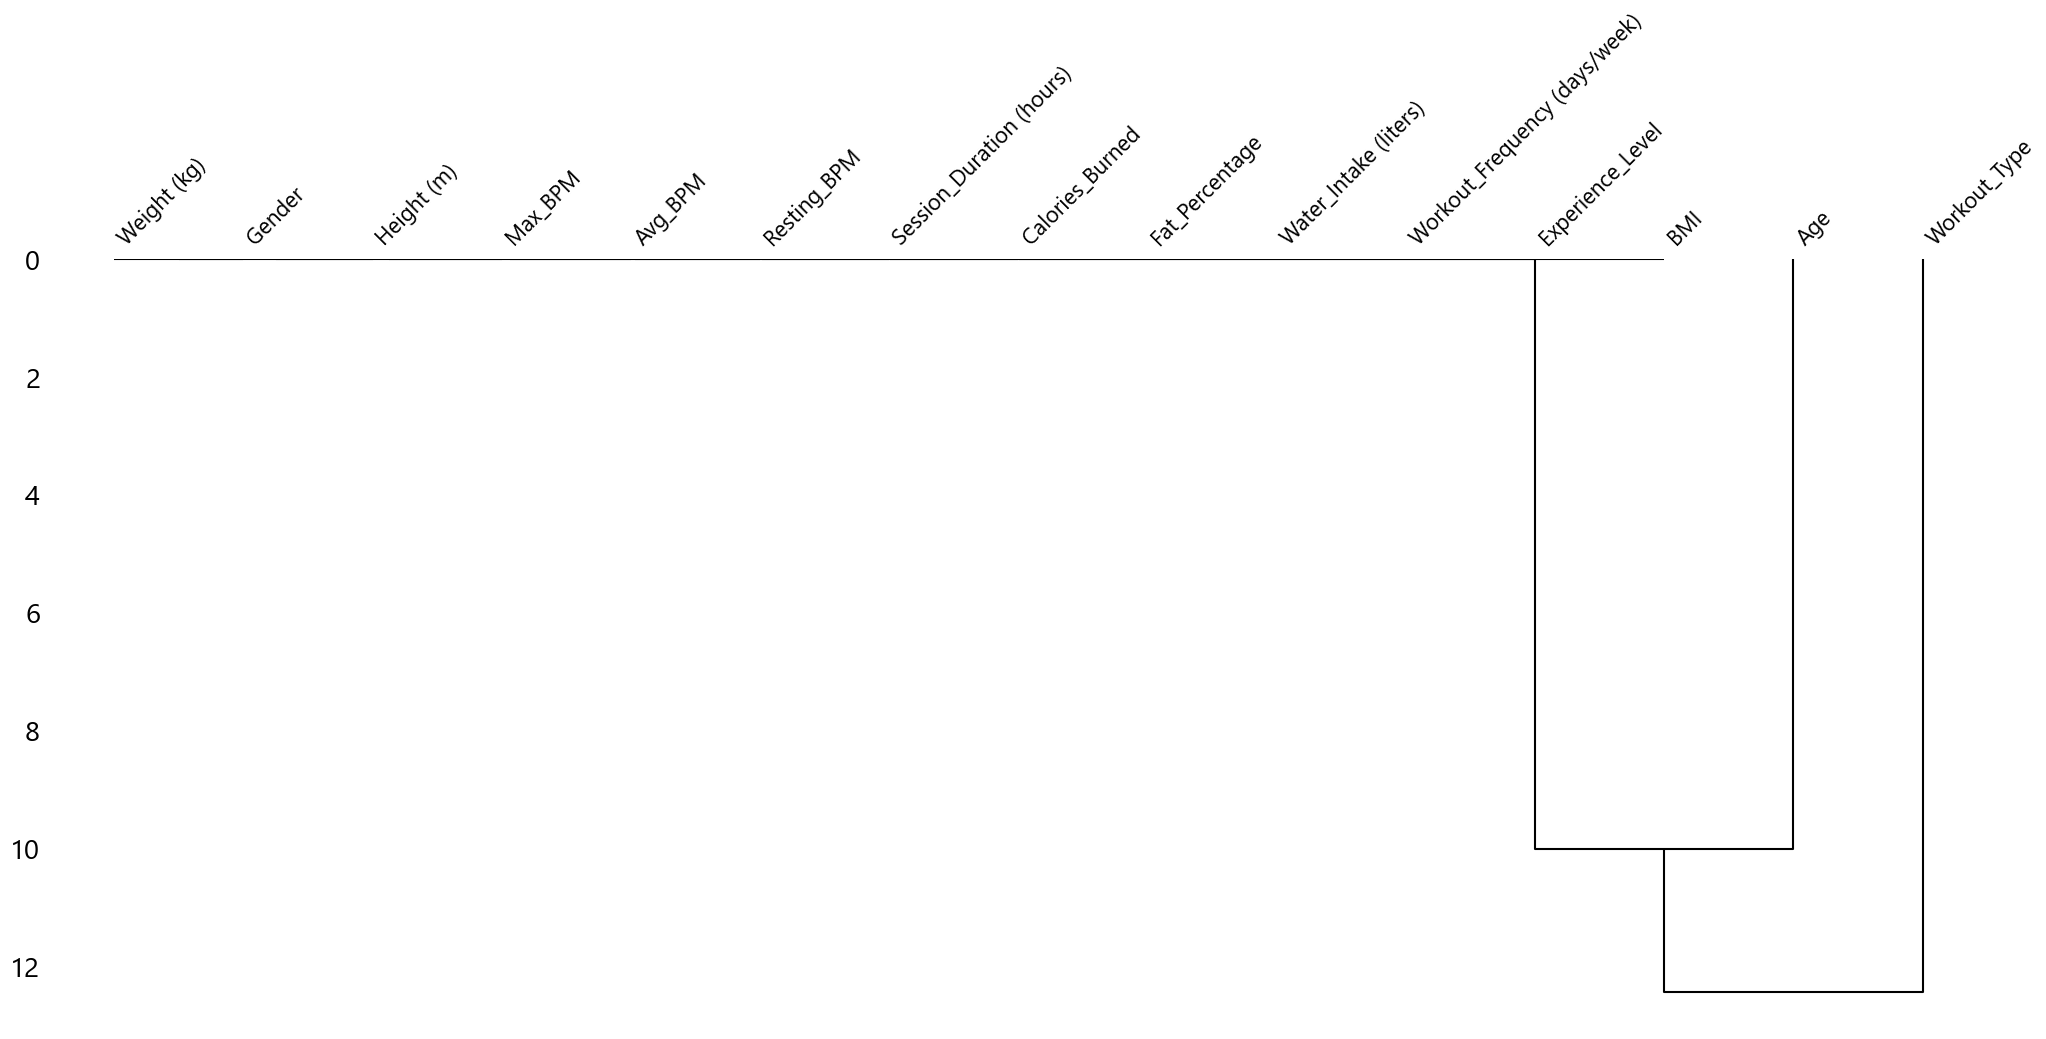

In [442]:
msno.dendrogram(df)

Z grafiki wynika brak zależności pomiędzy brakującymi danymi w tych samych wierszach (spora odległość od zera na osi Y).

Sprawdzamy, czy brakujące wartości wynikają z danej zależności - płeć oraz waga użytkownika

In [443]:
df.groupby('Gender')['Age'].apply(lambda x: x.isnull().sum())

Gender
Female    41
Male      59
Name: Age, dtype: int64

In [444]:
df[df['Age'].isna()]['Weight (kg)'].mean()

np.float64(75.01299999999999)

In [445]:
df[~df['Age'].isna()]['Weight (kg)'].mean()

np.float64(73.72199312714777)

W oparciu o powyższe wyniki wnioskujemy, że braki są zupełnie losowe (MCAR), a ze względu na to, że stanowią około 15% zbioru nie będą one usuwane, a imputowane.

<Axes: >

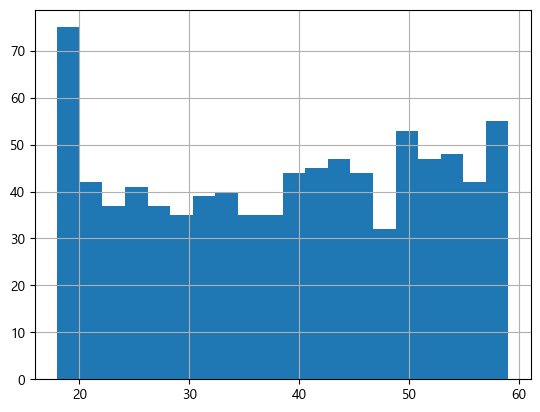

In [446]:
df['Age'].hist(bins=20)

Rozkład wieku nie jest idealnie symetryczny - widoczny jest spory pik po lewej stronie histogramu (młodzi użytkownicy siłowni). Średnia może być zawyżona przez osoby starsze, więc imputacja medianą lepiej odzwierciedli typowego użytkownika

In [447]:
df['Age_Imputed'] = df['Age'].fillna(df['Age'].median())

Dokonujemy sprawdzenia, czy istnieje związek statystyczny między typem treningu, a płcią użytkownika siłowni

In [448]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Workout_Type'], df['Gender'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi2 test p-value: {p}")

Chi2 test p-value: 0.5523515099225926


P-value jest wysokie (> 0.05) co sugeruje, że zmienne są niezależne. Podobnie sprawdzamy zależność typu treningu od zmiennych numerycznych w zbiorze danych przy pomocy jednoczynnikowej analizy wariancji (ANOVA).

Normalizacja wieku w celu skorzystania z analizy ANOVA

In [449]:
from scipy.stats import boxcox
df['Age_Transformed'], lambda_param = boxcox(df['Age_Imputed'])

In [450]:
from scipy.stats import f_oneway

for col in df.select_dtypes(include='number').columns:
    groups = [group[col].dropna() for name, group in df.groupby('Workout_Type')]
    if len(groups) > 1:
        stat, p = f_oneway(*groups)
        print(f"{col}: p-value = {p:.4f}")


Age: p-value = 0.7154
Weight (kg): p-value = 0.6959
Height (m): p-value = 0.5577
Max_BPM: p-value = 0.7012
Avg_BPM: p-value = 0.8644
Resting_BPM: p-value = 0.6219
Session_Duration (hours): p-value = 0.1248
Calories_Burned: p-value = 0.2411
Fat_Percentage: p-value = 0.0824
Water_Intake (liters): p-value = 0.4088
Workout_Frequency (days/week): p-value = 0.4954
Experience_Level: p-value = 0.1320
BMI: p-value = 0.7005
Age_Imputed: p-value = 0.7217
Age_Transformed: p-value = 0.7246


Ponownie nie znaleziono zależności między typem treningu, a pozostałymi cechami.

Wizualizacja macierzy korelacji pomiędzy wszystkimi zmiennymi numerycznymi

<Axes: >

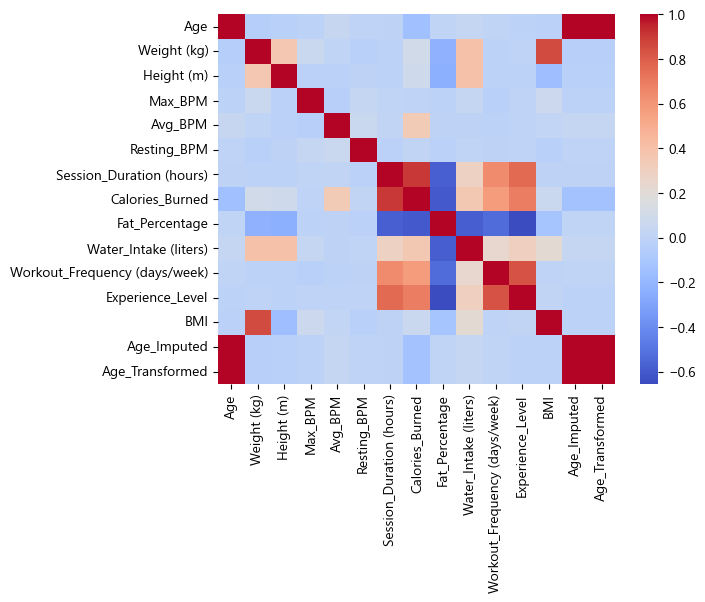

In [451]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')

Brak istotnych statystycznie zależności między Workout Type, a innymi kolumnami. Liczne braki, uzupelnienie najczęstszą wartością nie ma sensu, dlatego użyte zostanie oznaczenie "Unknown".

In [452]:
df['Workout_Type'] = df['Workout_Type'].fillna('Unknown')

Sprawdzamy, że typ treningu został zmieniony z pustej wartości na etykietę 'nieznany'.

In [453]:
df['Workout_Type'].value_counts()

Workout_Type
Cardio      220
Strength    219
Yoga        200
HIIT        184
Unknown     150
Name: count, dtype: int64

Przekształcamy dane zawarte w zbiorze w celu podniesienia intuicyjności i lepszego ich zrozumienia.

In [454]:
# Zamiana liczb na tekstowy poziom
df['Experience_Level'] = df['Experience_Level'].map({
    1: 'Beginner',
    2: 'Intermediate',
    3: 'Advanced'
})

In [455]:
df['Session_Duration (minutes)'] = df['Session_Duration (hours)'] * 60

Sprawdzamy wartości w zbiorze danych pod kątem utworzonych reguł logicznych (np. wzrost czy waga nie mogą być ujemne ani równe zeru) i posiadanej wiedzy (puls człowieka nie powinien wynosić ponad 220 uderzeń na minutę itp.)

In [456]:
tolerance = 0.01

def check_rules(df):
    rules = {
        "Age > 0": df["Age_Imputed"] > 0,
        "Weight > 0": df["Weight (kg)"] > 0,
        "Height > 0": df["Height (m)"] > 0,
        "Max_BPM > 0": df["Max_BPM"] > 0,
        "Max_BPM < 220": df["Max_BPM"] < 220,
        "Avg_BPM > 0": df["Avg_BPM"] > 0,
        "Resting_BPM > 0": df["Resting_BPM"] > 0,
        "Fat_Percentage > 0": df["Fat_Percentage"] > 0,
        "Fat_Percentage < 100": df["Fat_Percentage"] < 100,
        "Workout_Frequency (days/week) >= 0": df["Workout_Frequency (days/week)"] >= 0,
        "Workout_Frequency (days/week) <= 7": df["Workout_Frequency (days/week)"] <= 7,
        "Calories_Burned >= 0": df["Calories_Burned"] >= 0,

        "Age < 130": df["Age_Imputed"] < 130,
        "Weight < 640": df["Weight (kg)"] < 640,
        "Height < 2.3": df["Height (m)"] < 2.3,

        "Max_BPM >= Avg_BPM": df["Max_BPM"] >= df["Avg_BPM"],
        "Avg_BPM >= Resting_BPM": df["Avg_BPM"] >= df["Resting_BPM"],
        "BMI = Weight / Height ** 2": np.abs(df["BMI"] - (df["Weight (kg)"] / (df["Height (m)"] ** 2))) < tolerance
    }
    return rules

rules = check_rules(df)

for rule, result in rules.items():
    print(f"{rule}: {result.all()}")

Age > 0: True
Weight > 0: True
Height > 0: True
Max_BPM > 0: True
Max_BPM < 220: True
Avg_BPM > 0: True
Resting_BPM > 0: True
Fat_Percentage > 0: True
Fat_Percentage < 100: True
Workout_Frequency (days/week) >= 0: True
Workout_Frequency (days/week) <= 7: True
Calories_Burned >= 0: True
Age < 130: True
Weight < 640: True
Height < 2.3: True
Max_BPM >= Avg_BPM: False
Avg_BPM >= Resting_BPM: True
BMI = Weight / Height ** 2: True


In [457]:
violations = {rule: ~result for rule, result in rules.items()}

summary = {rule: result.sum() for rule, result in violations.items()}

print("Summary of Violations:")
for rule, count in summary.items():
    print(f"{rule}: {count} violations")

Summary of Violations:
Age > 0: 0 violations
Weight > 0: 0 violations
Height > 0: 0 violations
Max_BPM > 0: 0 violations
Max_BPM < 220: 0 violations
Avg_BPM > 0: 0 violations
Resting_BPM > 0: 0 violations
Fat_Percentage > 0: 0 violations
Fat_Percentage < 100: 0 violations
Workout_Frequency (days/week) >= 0: 0 violations
Workout_Frequency (days/week) <= 7: 0 violations
Calories_Burned >= 0: 0 violations
Age < 130: 0 violations
Weight < 640: 0 violations
Height < 2.3: 0 violations
Max_BPM >= Avg_BPM: 23 violations
Avg_BPM >= Resting_BPM: 0 violations
BMI = Weight / Height ** 2: 0 violations


Dataset zawiera błędne dane dotyczące średniego pomiaru akcji serca użytkowników, gdyż logicznie średnia ilość uderzeń na minutę (Avg_BPM) nie może być wyższa od maksymalnej ilości uderzeń (Max_BPM). Z tego względu próbujemy odnaleźć źródło błędu.

In [458]:
valid_avg_bpm_mask = (df["Max_BPM"] >= df["Avg_BPM"])

valid_avg_bpm_rows = df[valid_avg_bpm_mask]
invalid_avg_bpm_rows = df[~valid_avg_bpm_mask]

invalid_avg_bpm_rows

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Age_Imputed,Age_Transformed,Session_Duration (minutes)
16,19.0,Female,64.0,1.53,166,167,58,1.33,1111,HIIT,29.8,2.3,3,Intermediate,27.34,19.0,16.247863,79.8
46,24.0,Male,54.7,1.74,160,167,53,0.84,772,Yoga,22.9,3.6,3,Beginner,18.07,24.0,20.552274,50.4
56,59.0,Female,65.5,1.52,161,162,61,1.40,1021,Yoga,31.2,2.1,3,Intermediate,28.35,59.0,49.773936,84.0
95,59.0,Female,54.6,1.57,164,169,64,0.58,441,Cardio,29.2,2.3,3,Beginner,22.15,59.0,49.773936,34.8
106,41.0,Male,71.7,1.96,162,168,51,0.51,424,Yoga,27.3,2.5,2,Beginner,18.66,41.0,34.901660,30.6
230,28.0,Male,76.3,1.62,161,162,70,1.16,1034,Strength,20.1,2.3,3,Intermediate,29.07,28.0,23.963750,69.6
310,52.0,Female,64.9,1.51,164,165,68,1.83,1359,HIIT,18.2,2.7,4,Advanced,28.46,52.0,44.021104,109.8
326,48.0,Male,69.0,1.74,160,167,58,1.48,1223,HIIT,30.0,2.3,3,Intermediate,22.79,48.0,40.717032,88.8
356,31.0,Female,62.5,1.62,168,169,74,1.56,1318,Unknown,16.5,2.7,4,Advanced,23.81,31.0,26.506545,93.6
365,39.0,Female,60.6,1.65,162,167,63,0.92,768,HIIT,27.6,1.7,3,Beginner,22.26,39.0,33.231527,55.2


In [459]:
valid_avg_bpm_rows.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI,Age_Imputed,Age_Transformed,Session_Duration (minutes)
count,854.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,38.594848,73.890842,1.723547,180.296842,143.224211,62.218947,1.259411,904.734737,24.955053,2.631368,3.330526,24.891495,38.635789,32.852320,75.564632
std,12.255000,21.212923,0.127746,11.344509,14.077583,7.341472,0.343101,272.913059,6.300144,0.602546,0.915972,6.629312,11.619267,9.742529,20.586061
min,18.000000,40.000000,1.500000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,12.320000,18.000000,15.380732,30.000000
25%,28.000000,58.100000,1.620000,171.000000,131.000000,56.000000,1.040000,719.250000,21.225000,2.200000,3.000000,20.110000,29.000000,24.812761,62.400000
50%,39.000000,70.050000,1.710000,181.000000,142.000000,62.000000,1.270000,888.000000,26.200000,2.600000,3.000000,24.195000,39.000000,33.231527,76.200000
75%,50.000000,86.075000,1.800000,190.000000,155.750000,68.000000,1.460000,1074.750000,29.300000,3.100000,4.000000,28.560000,49.000000,41.544270,87.600000
max,59.000000,129.900000,2.000000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,49.840000,59.000000,49.773936,120.000000


In [460]:
invalid_avg_bpm_rows.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI,Age_Imputed,Age_Transformed,Session_Duration (minutes)
count,19.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,40.052632,72.360870,1.682609,162.826087,166.173913,62.391304,1.133043,933.826087,25.873913,2.430435,2.956522,25.764783,39.869565,33.883927,67.982609
std,13.351961,21.398359,0.122705,2.461562,2.348155,6.853925,0.323608,265.439370,4.246840,0.460666,0.705708,7.980813,12.084191,10.111885,19.416480
min,19.000000,41.600000,1.510000,160.000000,162.000000,50.000000,0.510000,424.000000,16.500000,1.500000,2.000000,15.720000,19.000000,16.247863,30.600000
25%,29.500000,60.650000,1.615000,161.000000,165.000000,58.500000,0.880000,762.000000,22.750000,2.200000,2.500000,20.570000,31.000000,26.506545,52.800000
50%,41.000000,65.500000,1.650000,162.000000,167.000000,63.000000,1.140000,986.000000,26.600000,2.300000,3.000000,23.800000,39.000000,33.231527,68.400000
75%,51.500000,77.300000,1.740000,164.000000,168.000000,67.000000,1.355000,1127.500000,29.000000,2.650000,3.000000,28.765000,49.500000,41.956660,81.300000
max,59.000000,123.300000,1.960000,168.000000,169.000000,74.000000,1.830000,1359.000000,32.800000,3.600000,4.000000,46.980000,59.000000,49.773936,109.800000


Przyrównanie kolumn innych od BPM nie sugeruje źródła problemu.

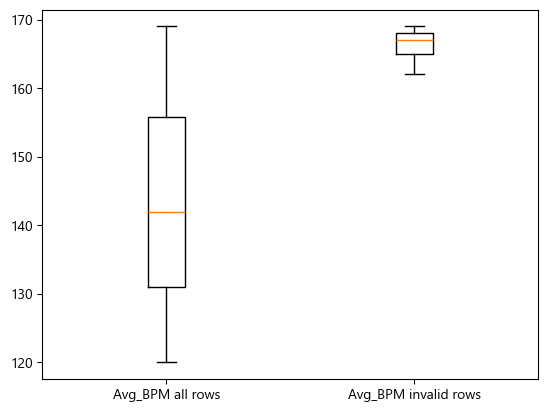

In [461]:
plt.boxplot([valid_avg_bpm_rows["Avg_BPM"], invalid_avg_bpm_rows["Avg_BPM"]], tick_labels=["Avg_BPM all rows", "Avg_BPM invalid rows"]);

Wartości średniej liczby uderzeń na minutę (BPM) dla wierszy z wartościami nieprawidłowymi (podejrzanymi) są konsekwentnie bardzo wysokie względem pozostałych wierszy - wyższa mediana, średnia, niewielki zakres obejmujący stosunkowo wysokie wartości Avg BPM z ostatniego kwartyla. Wartości uznane za niepoprawne wyraźnie odróżniają się od ogólnej populacji danych co sugeruje, że rzeczywiście są one nieprawidłowe i zostaną usunięte.

In [462]:
df = valid_avg_bpm_rows
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Age_Imputed,Age_Transformed,Session_Duration (minutes)
0,NaN,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,Advanced,30.20,39.0,33.231527,101.4
1,46.0,Female,74.9,1.53,179,151,66,1.30,883,Unknown,33.9,2.1,4,Intermediate,32.00,46.0,39.060010,78.0
2,32.0,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,Intermediate,24.71,32.0,27.351413,66.6
3,25.0,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,Beginner,18.41,25.0,21.407583,35.4
4,38.0,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,Beginner,14.39,38.0,32.394902,38.4


Badamy zbiór danych pod kątem zduplikowanych wierszy.

In [463]:
df.duplicated().sum()

np.int64(0)

W zbiorze nie znaleziono duplikatów.

Wizualizacje
---

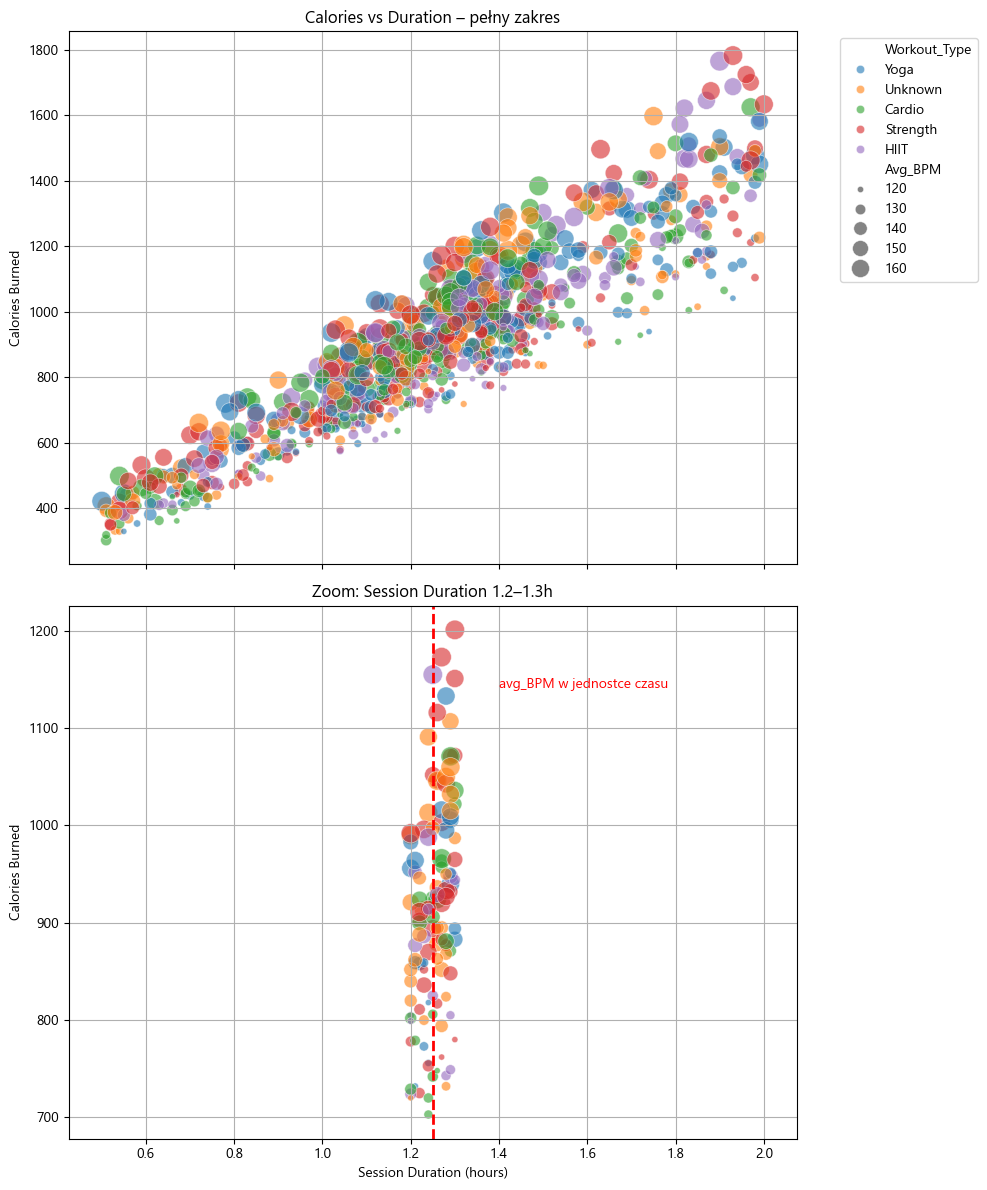

In [464]:
df_zoom = df[(df['Session_Duration (hours)'] >= 1.2) & (df['Session_Duration (hours)'] <= 1.3)]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

sns.scatterplot(
    data=df,
    x='Session_Duration (hours)',
    y='Calories_Burned',
    size='Avg_BPM',
    hue='Workout_Type',
    alpha=0.6,
    sizes=(20, 200),
    ax=ax1
)

ax1.set_title('Calories vs Duration – pełny zakres')
ax1.set_ylabel('Calories Burned')
ax1.grid(True)

sns.scatterplot(
    data=df_zoom,
    x='Session_Duration (hours)',
    y='Calories_Burned',
    size='Avg_BPM',
    hue='Workout_Type',
    alpha=0.6,
    sizes=(20, 200),
    ax=ax2
)
ax2.axvline(x=1.25, color='red', linestyle='--', linewidth=2)
ax2.text(1.4, df_zoom['Calories_Burned'].max() * 0.95, 'avg_BPM w jednostce czasu', color='red')
ax2.set_title('Zoom: Session Duration 1.2–1.3h')
ax2.set_xlabel('Session Duration (hours)')
ax2.set_ylabel('Calories Burned')
ax2.grid(True)

ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.get_legend().remove()

plt.tight_layout()
plt.show()




Powyzej - pierwszy wykres jasno wskazuje: im dłuzsza sesja treningowa, tym więcej spalonych kalorii. 
Wielkość średnicy rekordu odzwierciedla średnie tętno uczestnika siłowni. Na drugim wykresie wykazano rekordy w zakresie 1.2 - 1.3h długości sesji (średnia długość sesji wynosi ~1.25h.). Zoom zastosowano aby dokładniej wskazać na zalezność: w bardzo podobnym czasie treningu, tym mniej kalorii spaliła osoba, im nizsze średnie tętno podczas treningu zostało utrzymane.
<br>Typ treningu nie wskazuje jasno na efektywność danego treningu. Najwyzsze wartości spalonych kalorii zdecydowanie nalezą do treningu siłowego oraz wysokointensywnego treningu interewałowego (HIIT), których na prózno szukać w w zakresie ponizej 400 spalonych kalorii. Natomiast równie dobrze trening yogi wykazuje stosunkowo równiez duze mozliwości pod kątem spalania kalorii.

In [465]:
# Ustalona kolejność doświadczenia
order_x = ['Beginner', 'Intermediate', 'Advanced']
order_hue = ['≤905', '>905']

plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='Experience_Level',
    hue='Calorie_Group',
    order=order_x,
    hue_order=order_hue 
)

plt.title('Experience Level vs Calorie Group (≤905 vs >905)')
plt.xlabel('')
plt.ylabel('Number of People')
plt.legend(title='Calories Burned')
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Calorie_Group` for `hue`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

Osoby zaawansowane spalały podczas sesji praktycznie zawsze więcej kalorii niz średnia dla całego badania. Osoby początkujące rzadko dobijały do średniej (905 kcal). Osoby o średnim etapie wtajemniczenia w kulturę fizyczną zgodnie z oczekiwaniami prawie po równo rozeszły się po obu stronach średniej.

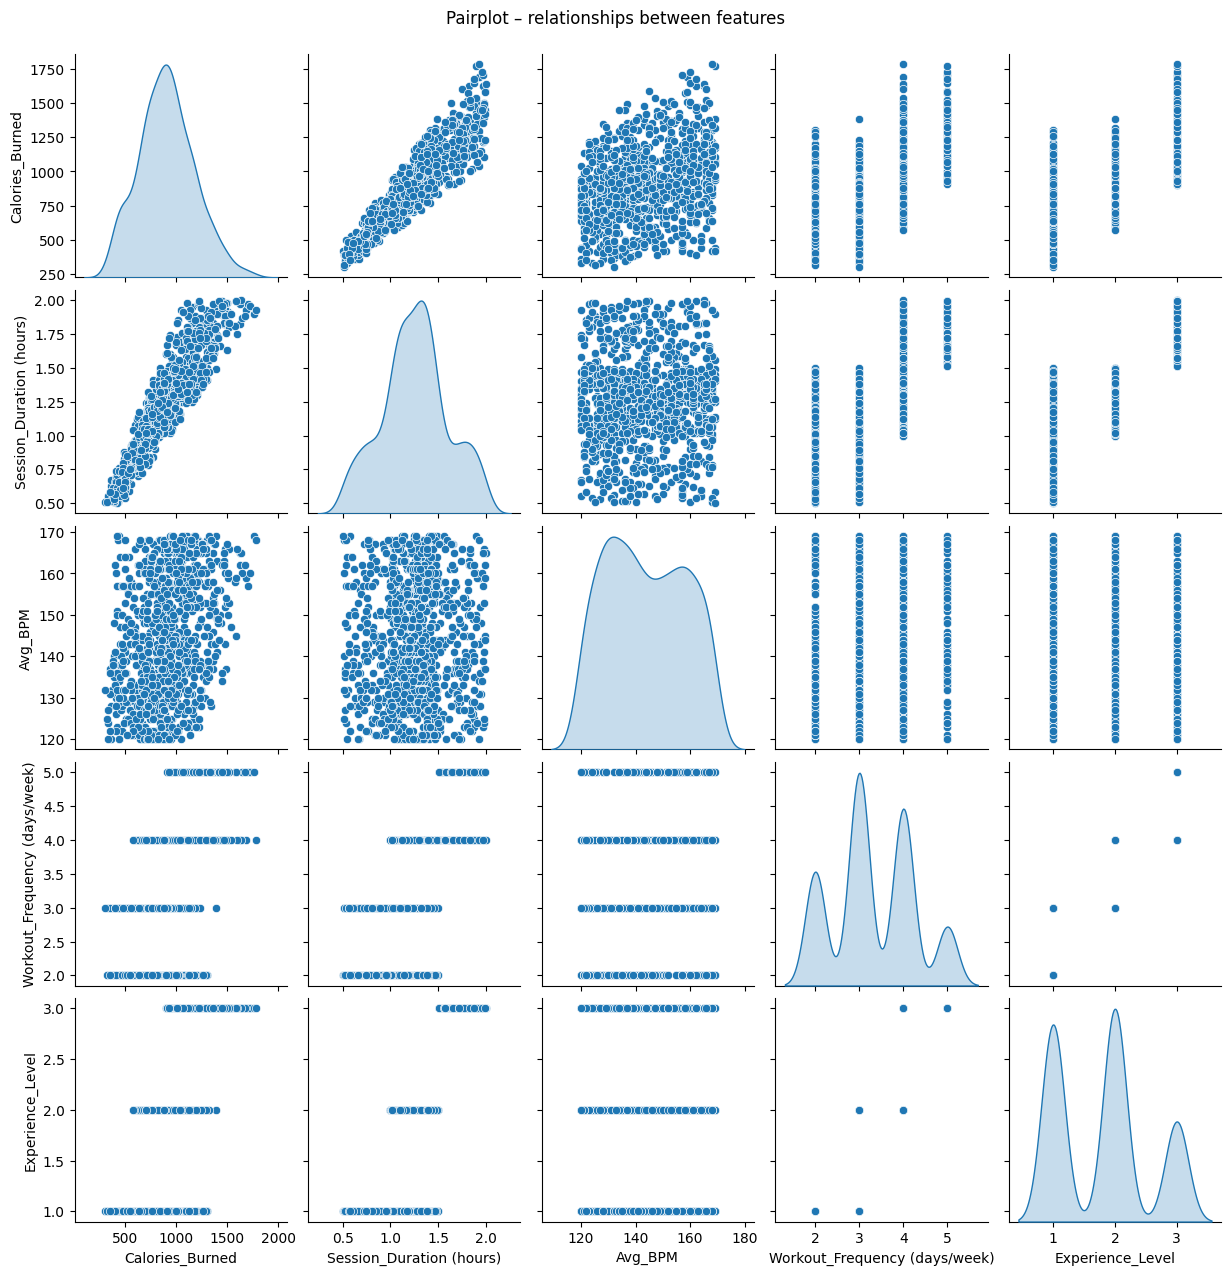

In [ ]:
sns.pairplot(df[
    ['Calories_Burned', 'Session_Duration (hours)', 'Avg_BPM', 'Workout_Frequency (days/week)', 'Experience_Level']
], diag_kind='kde')
plt.suptitle('Pairplot – relationships between features', y=1.02)
plt.show()




--- tu nie mam pojęcia czy coś z tego powyzej jest do wyciągnięcia ... ---

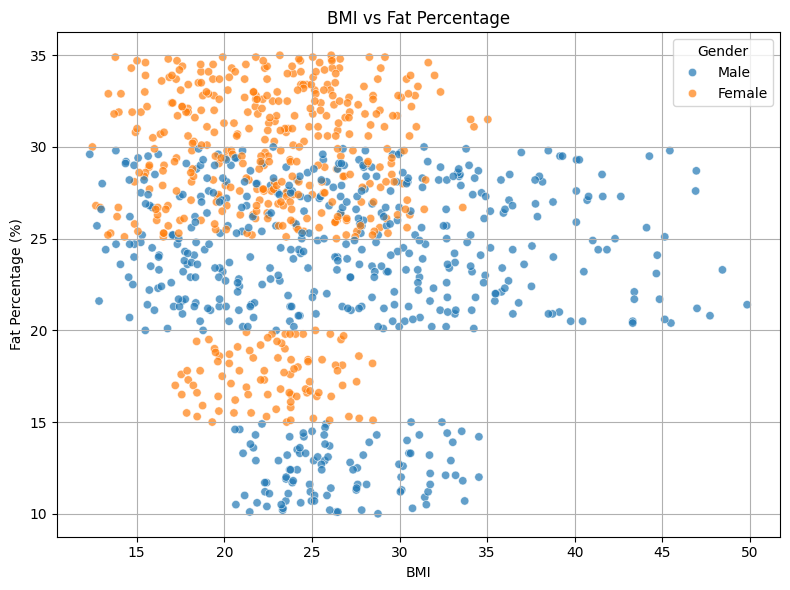

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='BMI',
    y='Fat_Percentage',
    hue='Gender',
    alpha=0.7
)
plt.title('BMI vs Fat Percentage')
plt.xlabel('BMI')
plt.ylabel('Fat Percentage (%)')
plt.grid(True)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


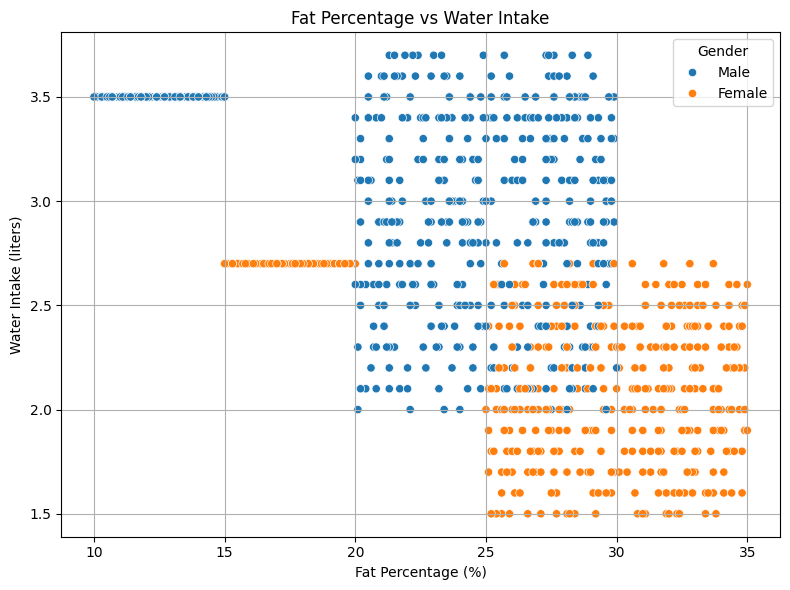

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Fat_Percentage',
    y='Water_Intake (liters)',
    hue='Gender',
    alpha=1
)
plt.title('Fat Percentage vs Water Intake')
plt.xlabel('Fat Percentage (%)')
plt.ylabel('Water Intake (liters)')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
count = df[(df['Gender'] == 'Male') & (df['Water_Intake (liters)'] == 3.5)].shape[0]
print(f"Liczba mężczyzn z 3.5 litra wody: {count}")


Liczba mężczyzn z 3.5 litra wody: 124


> Liczba mężczyzn z 3.5 litra wody: 124

<br>błąd danych?

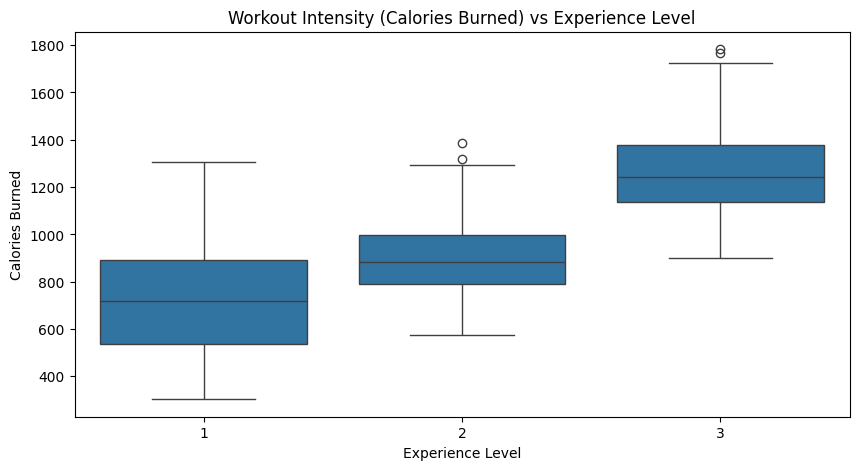

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Experience_Level", y="Calories_Burned", data=df)
plt.title("Workout Intensity (Calories Burned) vs Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Calories Burned")
plt.show()

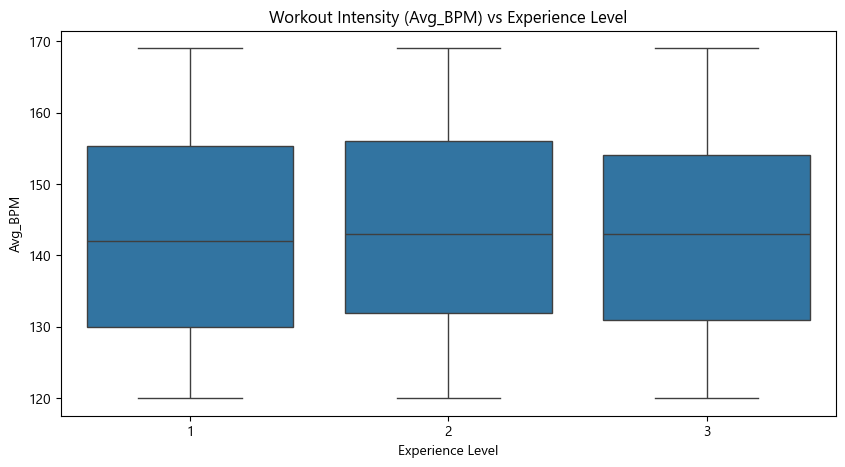

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Experience_Level", y="Avg_BPM", data=df)
plt.title("Workout Intensity (Avg_BPM) vs Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Avg_BPM")
plt.show()

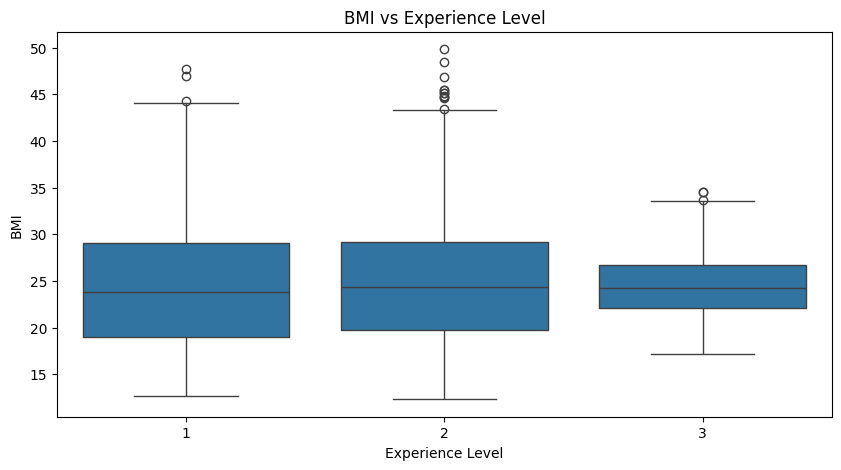

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Experience_Level", y="BMI", data=df)
plt.title("BMI vs Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("BMI")
plt.show()

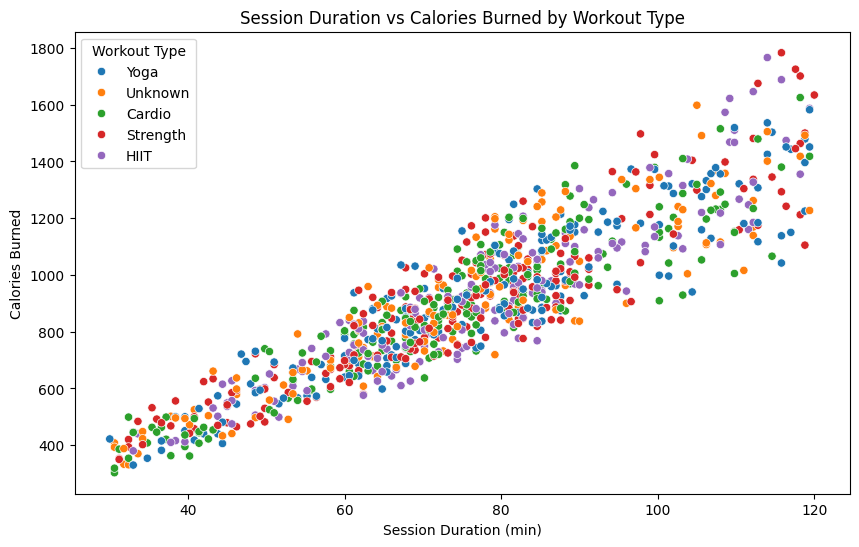

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Session_Duration (minutes)", y="Calories_Burned", hue="Workout_Type")
plt.title("Session Duration vs Calories Burned by Workout Type")
plt.xlabel("Session Duration (min)")
plt.ylabel("Calories Burned")
plt.legend(title="Workout Type")
plt.show()

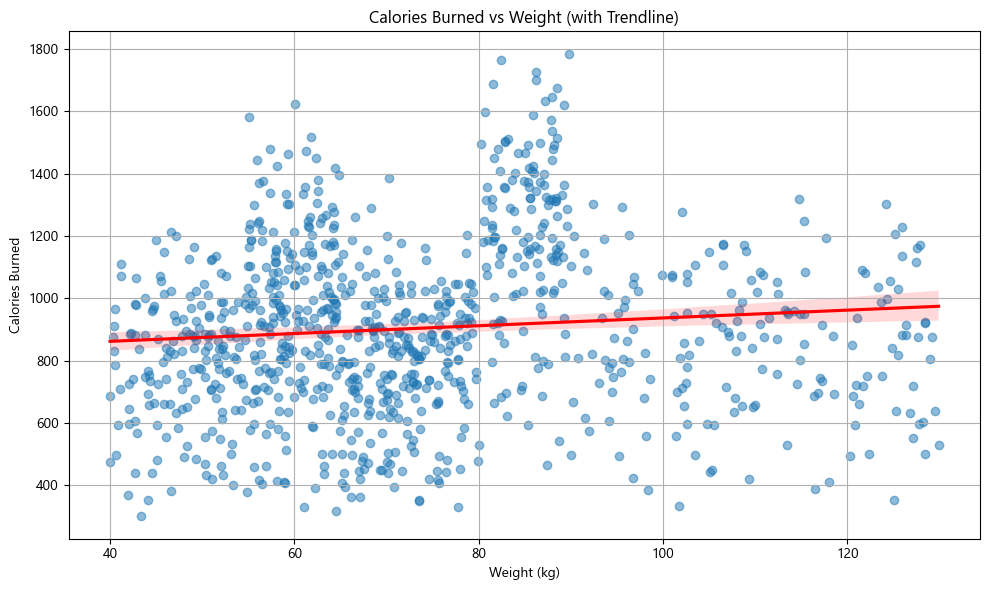

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Weight (kg)', y='Calories_Burned', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Calories Burned vs Weight (with Trendline)')
plt.xlabel('Weight (kg)')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.tight_layout()
plt.show()

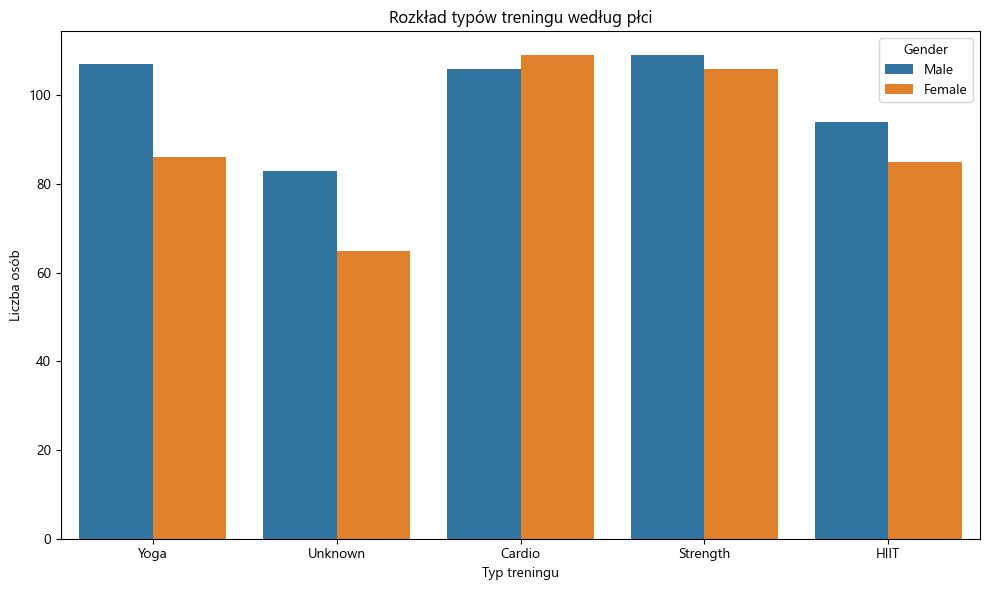

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Workout_Type', hue='Gender')
plt.title('Rozkład typów treningu według płci')
plt.xlabel('Typ treningu')
plt.ylabel('Liczba osób')
plt.xticks()
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

W zbiorze występuje lekka nadreprezentacja rekordów dotyczących danych mężczyzn.

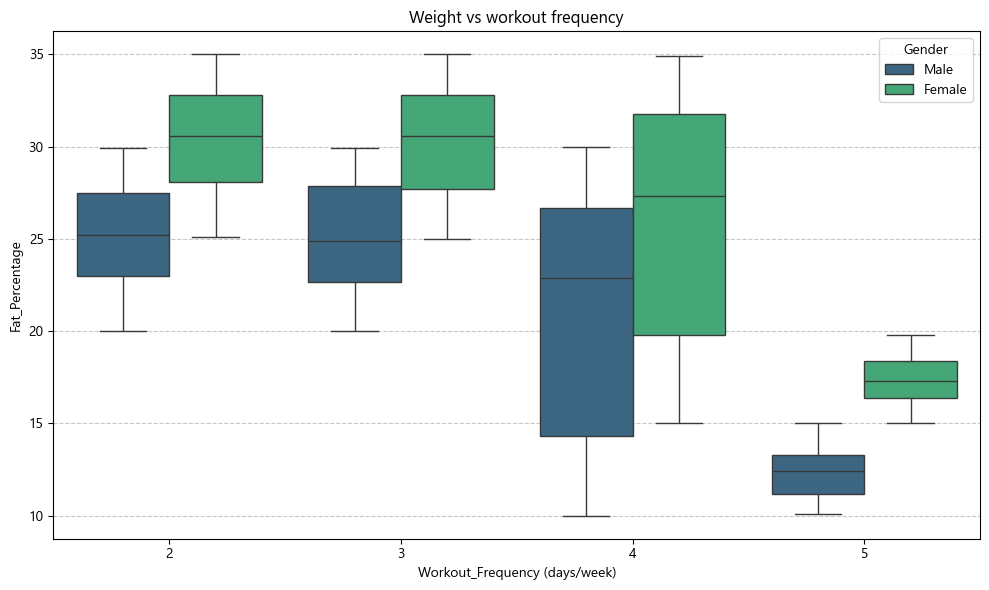

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Workout_Frequency (days/week)', y='Fat_Percentage', hue='Gender', palette='viridis')
plt.title('Weight vs workout frequency')
plt.xlabel('Workout_Frequency (days/week)')
plt.ylabel('Fat_Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Osoby trenujące więcej razy w tygodniu mają w ujęciu średnim niższą tkankę tłuszczową.

<Axes: xlabel='Gender', ylabel='Fat_Percentage'>

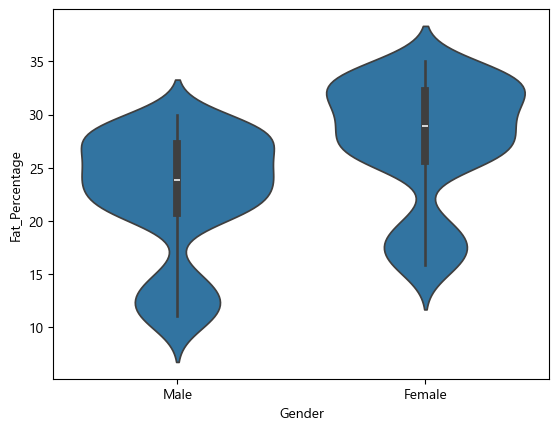

In [ ]:
sns.violinplot(x='Gender', y='Fat_Percentage', data=df)

Sprawa dla reportera - dlaczego są wcięcia na powyższych wykresach? 
a) naturalna charakterystyka rozkładu tkanki tłuszczowej w społeczeństwie ??
b) niewiele obserwacji w danym zakresie (dlaczego powtarza się dla kobiet i mężczyzn)
c) rozkład populacji na dwie grupy - osoby o aktywnym i siedzącym trybie życia (nie pasuje do danych z siłowni)

Analiza opisowa
---

Wnioski
---